# Testing with old data


In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/alpha0.3_k20_res0.005.graphml"
G = nx.read_graphml(p)

clusters_to_keep = list(range(5, 15))
# G = G.subgraph([n for n, d in G.nodes(data=True) if d["cluster"] in clusters_to_keep])
#
# p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/SUBSETalpha0.3_k20_res0.005.graphml"
# nx.write_graphml(G, p)

In [14]:
list(G.edges(data=True))[:5]

[('n0', 'n20', {'weight': 0.635464131832123}),
 ('n0', 'n87', {'weight': 0.300000011920929}),
 ('n0', 'n91', {'weight': 0.300000011920929}),
 ('n0', 'n231', {'weight': 0.300000011920929}),
 ('n0', 'n302', {'weight': 0.634211599826813})]

In [13]:
list(G.nodes(data=True))[:5]

[('n0',
  {'doi': '10.1016/0024-3205(82)90686-5',
   'year': 1982.0,
   'title': 'Serotonergic mechanism in the control of β-endorphin and acth release in male rats',
   'eid': '2-s2.0-0020316326',
   'id': 'Bruni_1982',
   'cluster': 58.0,
   'centrality_alpha0.3_k20_res0.005': 0.267480333963621}),
 ('n1',
  {'doi': '10.1111/j.1600-0404.1982.tb03382.x',
   'year': 1982.0,
   'title': 'EFFECTS OF PAROXETINE ON SYNAPTOSOMAL NEUROTRANSMITTER UPTAKE AND SERUM 5‐HT CONCENTRATIONS IN MICE.',
   'eid': '2-s2.0-0019936013',
   'id': 'Magnussen_1982_4',
   'cluster': 36.0,
   'centrality_alpha0.3_k20_res0.005': 0.0944344690699838}),
 ('n2',
  {'year': 1982.0,
   'title': 'Treatment of intention myoclonus with paroxetine alone or in combination with L-5-hydroxytryptophan and carbidopa',
   'eid': '2-s2.0-0020058010',
   'id': 'Magnussen_1982_3',
   'cluster': 62.0,
   'centrality_alpha0.3_k20_res0.005': 0.0751322415536254}),
 ('n3',
  {'doi': '10.1007/BF01276577',
   'year': 1982.0,
   'title':

In [42]:
clusters_to_keep = list(range(5, 15))
Gsub = G.subgraph(
    [n for n, d in G.nodes(data=True) if d["cluster"] in clusters_to_keep]
)

# count edges between clusters
edges_between_clusters = {}

for n1, n2, d in G.edges(data=True):
    c1 = G.nodes[n1]["cluster"]
    c2 = G.nodes[n2]["cluster"]
    if c1 != c2:
        if (c1, c2) not in edges_between_clusters:
            edges_between_clusters[(c1, c2)] = 0
        if (c2, c1) not in edges_between_clusters:
            edges_between_clusters[(c2, c1)] = 0
        edges_between_clusters[(c1, c2)] += 1
        edges_between_clusters[(c2, c1)] += 1

excl_edges_between_clusters = {}
for (c1, c2), count in edges_between_clusters.items():
    if (c2, c1) not in excl_edges_between_clusters:
        excl_edges_between_clusters[(c1, c2)] = count


# sort after number of edges
excl_edges_between_clusters = sorted(
    excl_edges_between_clusters.items(), key=lambda x: x[1], reverse=True
)

excl_edges_between_clusters[:20]

[((8.0, 1.0), 3193),
 ((6.0, 7.0), 3117),
 ((4.0, 24.0), 1768),
 ((2.0, 91.0), 1702),
 ((5.0, 64.0), 1626),
 ((92.0, 1.0), 1611),
 ((4.0, 72.0), 1594),
 ((27.0, 29.0), 1477),
 ((5.0, 12.0), 1434),
 ((29.0, 3.0), 1401)]

In [35]:
excl_edges_between_clusters = {}

for (c1, c2), count in edges_between_clusters.items():
    # Check if the counts for both (c1, c2) and (c2, c1) exist in edges_between_clusters
    if (c1, c2) in edges_between_clusters and (c2, c1) in edges_between_clusters:
        # Retrieve the counts for both directions
        c1_c2_count = edges_between_clusters[(c1, c2)]
        c2_c1_count = edges_between_clusters[(c2, c1)]
        # Sum the counts to get the total count of edges between the clusters
        total_count = c1_c2_count + c2_c1_count
        # Add the total count to excl_edges_between_clusters
        excl_edges_between_clusters[(c1, c2)] = total_count

In [36]:
print(len(edges_between_clusters), len(excl_edges_between_clusters))

16168 13398


In [24]:
# sort after number of edges
edges_between_clusters = sorted(
    edges_between_clusters.items(), key=lambda x: x[1], reverse=True
)

edges_between_clusters[:10]

[((1.0, 8.0), 2253),
 ((6.0, 7.0), 1983),
 ((2.0, 91.0), 1180),
 ((7.0, 6.0), 1134),
 ((5.0, 64.0), 1131),
 ((29.0, 3.0), 1079),
 ((12.0, 5.0), 1076),
 ((27.0, 3.0), 1016),
 ((4.0, 24.0), 983),
 ((92.0, 1.0), 961)]

In [40]:
# sort after number of edges
excl_edges_between_clusters = sorted(
    excl_edges_between_clusters.items(), key=lambda x: x[1], reverse=True
)

excl_edges_between_clusters[:10]
# build sanky diagram

[((8.0, 1.0), 3193),
 ((6.0, 7.0), 3117),
 ((4.0, 24.0), 1768),
 ((2.0, 91.0), 1702),
 ((5.0, 64.0), 1626),
 ((92.0, 1.0), 1611),
 ((4.0, 72.0), 1594),
 ((27.0, 29.0), 1477),
 ((5.0, 12.0), 1434),
 ((29.0, 3.0), 1401)]

In [11]:
p = f"/Users/jlq293/Downloads/Nature150/www.nature.com/www.nature.com/immersive/d41586-019-03165-4/dat/cociteEdges2.csv"
edges = pd.read_csv(p)
p = "/Users/jlq293/Downloads/Nature150/www.nature.com/www.nature.com/immersive/d41586-019-03165-4/dat/cociteNodes.csv"
nodes = pd.read_csv(p)

print(f"Nr of nodes: {len(nodes)}")
print(f"Nr of edges: {len(edges)}")

Nr of nodes: 0
Nr of edges: 0


In [10]:
edges["path"][0]

'-1834.0;529.0;66.0|-1663.6;555.5;58.3|-1489.9;579.1;51.9|-1313.1;595.4;47.0|-1135.0;598.9;43.9|-956.9;584.2;42.0|-778.4;548.8;40.9|-598.5;493.8;40.4|-418.0;424.2;40.2|-241.3;347.2;40.1|-76.7;271.0;40.0|63.9;204.2;40.0|166.7;154.9;40.0|219.8;129.5;40.0|217.1;131.1;40.0|160.5;159.0;40.0|57.6;210.2;40.0|-80.9;280.8;40.1|-243.3;367.4;40.3|-418.1;467.4;40.8|-595.1;578.8;41.8|-766.3;699.5;43.6|-925.8;825.8;46.6|-1068.4;951.1;50.9|-1190.4;1067.8;56.6|-1290.1;1168.6;63.5|-1369.2;1248.6;71.3|-1433.1;1304.1;79.6|-1489.6;1330.5;88.0|-1546.8;1321.2;96.3|-1610.9;1269.4;103.9|-1684.1;1172.1;110.8|-1765.1;1033.0;117.1|-1850.6;862.9;122.8|-1937.9;677.8;128.4|-1716.0;640.0;124.4'

In [8]:
nodes.head()

,x,y,size,PubYear,HierCat,NatureID,Title
0,-1247,1345,5.3,1900,1,062366b0,Atmospheric Electricity
1,-284,1083,4.6,1900,10,062340b0,The Conductivity produced in Gases by the Moti...
2,822,346,7.9,1900,1,062620e0,Albinism and Natural Selection
3,-1316,1279,4.6,1900,10,062149b0,Atmospheric Electricity
4,587,1598,4.0,1900,4,062523e0,Leaf Decay and Autumn Tints


In [3]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/alpha0.3_k10_res0.002.graphml"
G = nx.read_graphml(p)
print(f"Nr of nodes: {len(G.nodes)}")
print(f"Nr of edges: {len(G.edges)}")`

Nr of nodes: 36975
Nr of edges: 553370


In [4]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/alpha0.3_k20_res0.005.graphml"
G = nx.read_graphml(p)
print(f"Nr of nodes: {len(G.nodes)}")
print(f"Nr of edges: {len(G.edges)}")

Nr of nodes: 40643
Nr of edges: 899992


In [5]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/05-graphs/citation-graph/directed_citation_graph.graphml"
G = nx.read_graphml(p)
print(f"Nr of nodes: {len(G.nodes)}")
print(f"Nr of edges: {len(G.edges)}")

Nr of nodes: 40643
Nr of edges: 360645


In [4]:
np.random.seed(1)
cats, n, m = 4, 80, 1000

cnodes = pd.concat(
    [
        pd.DataFrame.from_records(
            [("node" + str(i + 100 * c), "c" + str(c)) for i in range(n)],
            columns=["name", "cat"],
        )
        for c in range(cats)
    ],
    ignore_index=True,
)
cnodes.cat = cnodes.cat.astype("category")

cedges = pd.concat(
    [
        pd.DataFrame(
            np.random.randint(n * c, n * (c + 1), size=(m, 2)),
            columns=["source", "target"],
        )
        for c in range(cats)
    ],
    ignore_index=True,
)

In [5]:
cnodes

,name,cat
0,node0,c0
1,node1,c0
2,node2,c0
3,node3,c0
4,node4,c0
...,...,...
315,node375,c3
316,node376,c3
317,node377,c3
318,node378,c3


In [6]:
cedges

,source,target
0,37,12
1,72,9
2,75,5
3,79,64
4,16,1
...,...,...
3995,264,307
3996,292,251
3997,256,309
3998,263,279


In [12]:
p = "../data/04-embeddings/df_with_specter2_embeddings.pkl"
df_emb = pd.read_pickle(p)
pc = "../data/02-clean/scopus_cleaned_subset.pkl"

df_cl = pd.read_pickle(pc)

In [13]:
df_cl[["year", "unique_auth_year"]]

,year,unique_auth_year
0,1982,Bruni_1982
1,1982,Magnussen_1982_4
2,1982,Magnussen_1982_3
3,1982,Magnussen_1982_2
4,1982,Magnussen_1982
...,...,...
40638,2023,Manis_2023
40639,2023,Mandal_2023_2
40640,2023,Mandal_2023
40641,2023,TorresPinto_2023


In [16]:
eid_uan_dict = dict(zip(df_cl["eid"], df_cl["unique_auth_year"]))

df_emb["unique_auth_year"] = df_emb["eid"].map(eid_uan_dict)

# save to pickle
df_emb.to_pickle("../data/04-embeddings/df_with_specter2_embeddings.pkl")

In [15]:
df_emb[["year", "unique_auth_year"]]

,year,unique_auth_year
0,1982,Ogren_1982
1,1982,Heym_1982
2,1982,Boeck_1982
3,1982,Yoffe_1982
4,1982,Martin_1982
...,...,...
40638,2023,Ong_2023
40639,2023,Gandhi_2023
40640,2023,Cottone_2023
40641,2023,Kuzin_2023_2


In [8]:
df = pd.read_pickle(
    "/Users/jlq293/Projects/Study-1-Bibliometrics/data/03-interim/specter-embeddings/df_with_specter2_embeddings.pkl"
)
df.shape

(35153, 29)

In [6]:
df.columns

Index(['authors', 'title', 'year', 'cited_by', 'doi', 'link', 'abstract',
       'author_keywords', 'index_keywords', 'references', 'pubmed_id',
       'document_type', 'source', 'eid', 'journal', 'first_author', 'nameyear',
       'unique_nameyear', 'title_abstract', 'paper_id', 'oc_refs', 'oc_dois',
       'cr_refs', 'cr_dois', 'merged_dois', 'oc_nr_dois', 'cr_nr_dois',
       'merged_nr_dois', 'specter2_embeddings'],
      dtype='object')

# KNN


In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array(df["specter2_embeddings"].tolist())

# Number of neighbors
k = 10

# Initialize and fit the model
# metric='cosine' will use cosine similarity
knn = NearestNeighbors(n_neighbors=k, metric="cosine")
knn.fit(X)

# Find k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)

In [18]:
# max similarity score
len(distances)
# turn off scientific notation
np.set_printoptions(suppress=True)
distances

array([[0.        , 0.04248786, 0.05208212, ..., 0.05725467, 0.06045407,
        0.06075859],
       [0.00000006, 0.0923996 , 0.09254497, ..., 0.09979272, 0.09983027,
        0.0998652 ],
       [0.00000018, 0.06835675, 0.06915379, ..., 0.07794213, 0.07838231,
        0.07896042],
       ...,
       [0.0000003 , 0.04048586, 0.0540055 , ..., 0.06445777, 0.06479794,
        0.06515932],
       [0.        , 0.030954  , 0.03975713, ..., 0.04864299, 0.04924732,
        0.05060935],
       [0.        , 0.04249674, 0.04303199, ..., 0.0618006 , 0.06327552,
        0.06334496]], dtype=float32)

In [13]:
similarities

array([[1.        , 0.95751214, 0.9479179 , ..., 0.9427453 , 0.9395459 ,
        0.9392414 ],
       [0.99999994, 0.9076004 , 0.907455  , ..., 0.9002073 , 0.90016973,
        0.9001348 ],
       [0.9999998 , 0.93164325, 0.9308462 , ..., 0.92205787, 0.9216177 ,
        0.9210396 ],
       ...,
       [0.9999997 , 0.95951414, 0.9459945 , ..., 0.9355422 , 0.93520206,
        0.9348407 ],
       [1.        , 0.969046  , 0.96024287, ..., 0.951357  , 0.9507527 ,
        0.94939065],
       [1.        , 0.95750326, 0.956968  , ..., 0.9381994 , 0.9367245 ,
        0.93665504]], dtype=float32)

In [ ]:
# loop over each pair in similarty matrix and calcutee the edge weight by retrieving the cite score, multiply by alpha, and add to the

In [20]:
for i in range(5, 21, 5):
    print(i)

5
10
15


/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

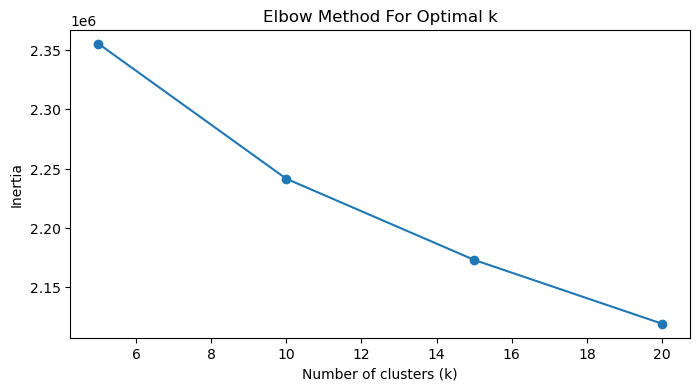

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a features matrix X

# Range of k to try
k_values = range(5, 21, 5)
inertia = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, m)
    model.fit(X)
    inertia.append(model.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

In [3]:
import networkx as nx
from sklearn.manifold import TSNE
import numpy as np
import plotly.graph_objects as go

# Create a sample graph
G = nx.karate_club_graph()
pos = nx.spring_layout(G)  # Initial 2D layout

# Convert positions to a list of coordinates
nodes = list(G.nodes())
pos_list = [pos[node] for node in nodes]

# Convert the list of coordinates to a NumPy array
pos_array = np.array(pos_list)

# Use t-SNE to project 2D coordinates to 3D
tsne = TSNE(n_components=3, random_state=0)
pos_3d = tsne.fit_transform(pos_array)

# Create a dictionary of 3D positions
pos_3d_dict = {nodes[i]: pos_3d[i] for i in range(len(nodes))}

# Prepare edge traces
edge_traces = []
for edge in G.edges():
    x_coords = [pos_3d_dict[edge[0]][0], pos_3d_dict[edge[1]][0], None]
    y_coords = [pos_3d_dict[edge[0]][1], pos_3d_dict[edge[1]][1], None]
    z_coords = [pos_3d_dict[edge[0]][2], pos_3d_dict[edge[1]][2], None]
    edge_trace = go.Scatter3d(
        x=x_coords,
        y=y_coords,
        z=z_coords,
        line=dict(width=2, color="#888"),
        hoverinfo="none",
        mode="lines",
    )
    edge_traces.append(edge_trace)

# Prepare node traces
node_trace = go.Scatter3d(
    x=[pos_3d_dict[node][0] for node in G.nodes()],
    y=[pos_3d_dict[node][1] for node in G.nodes()],
    z=[pos_3d_dict[node][2] for node in G.nodes()],
    mode="markers",
    marker=dict(
        size=5,
        color=[pos_3d_dict[node][2] for node in G.nodes()],
        colorscale="Viridis",
        line=dict(width=0),
    ),
    text=[f"Node {node}" for node in G.nodes()],
    hoverinfo="text",
)

# Create the 3D plot
fig = go.Figure(
    data=edge_traces + [node_trace],
    layout=go.Layout(
        title="3D Network Graph with t-SNE Projection",
        showlegend=False,
        scene=dict(
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False),
            zaxis=dict(showgrid=False, zeroline=False),
        ),
    ),
)

fig.show()

ValueError: n_components=3 must be between 1 and min(n_samples, n_features)=2 with svd_solver='randomized'